# Read data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')

# Data preprocessing

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
print('Data shape is',data.shape)

Data shape is (167, 10)


In [7]:
print(' Is there any missing values in data?',data.isnull().sum().any())
print(' Is there any duplicated values in data?',data.duplicated().sum().any())

 Is there any missing values in data? False
 Is there any duplicated values in data? False


**Encoding**

In [8]:
lb=LabelEncoder()
data.country=lb.fit_transform(data.country)

**pair plot**

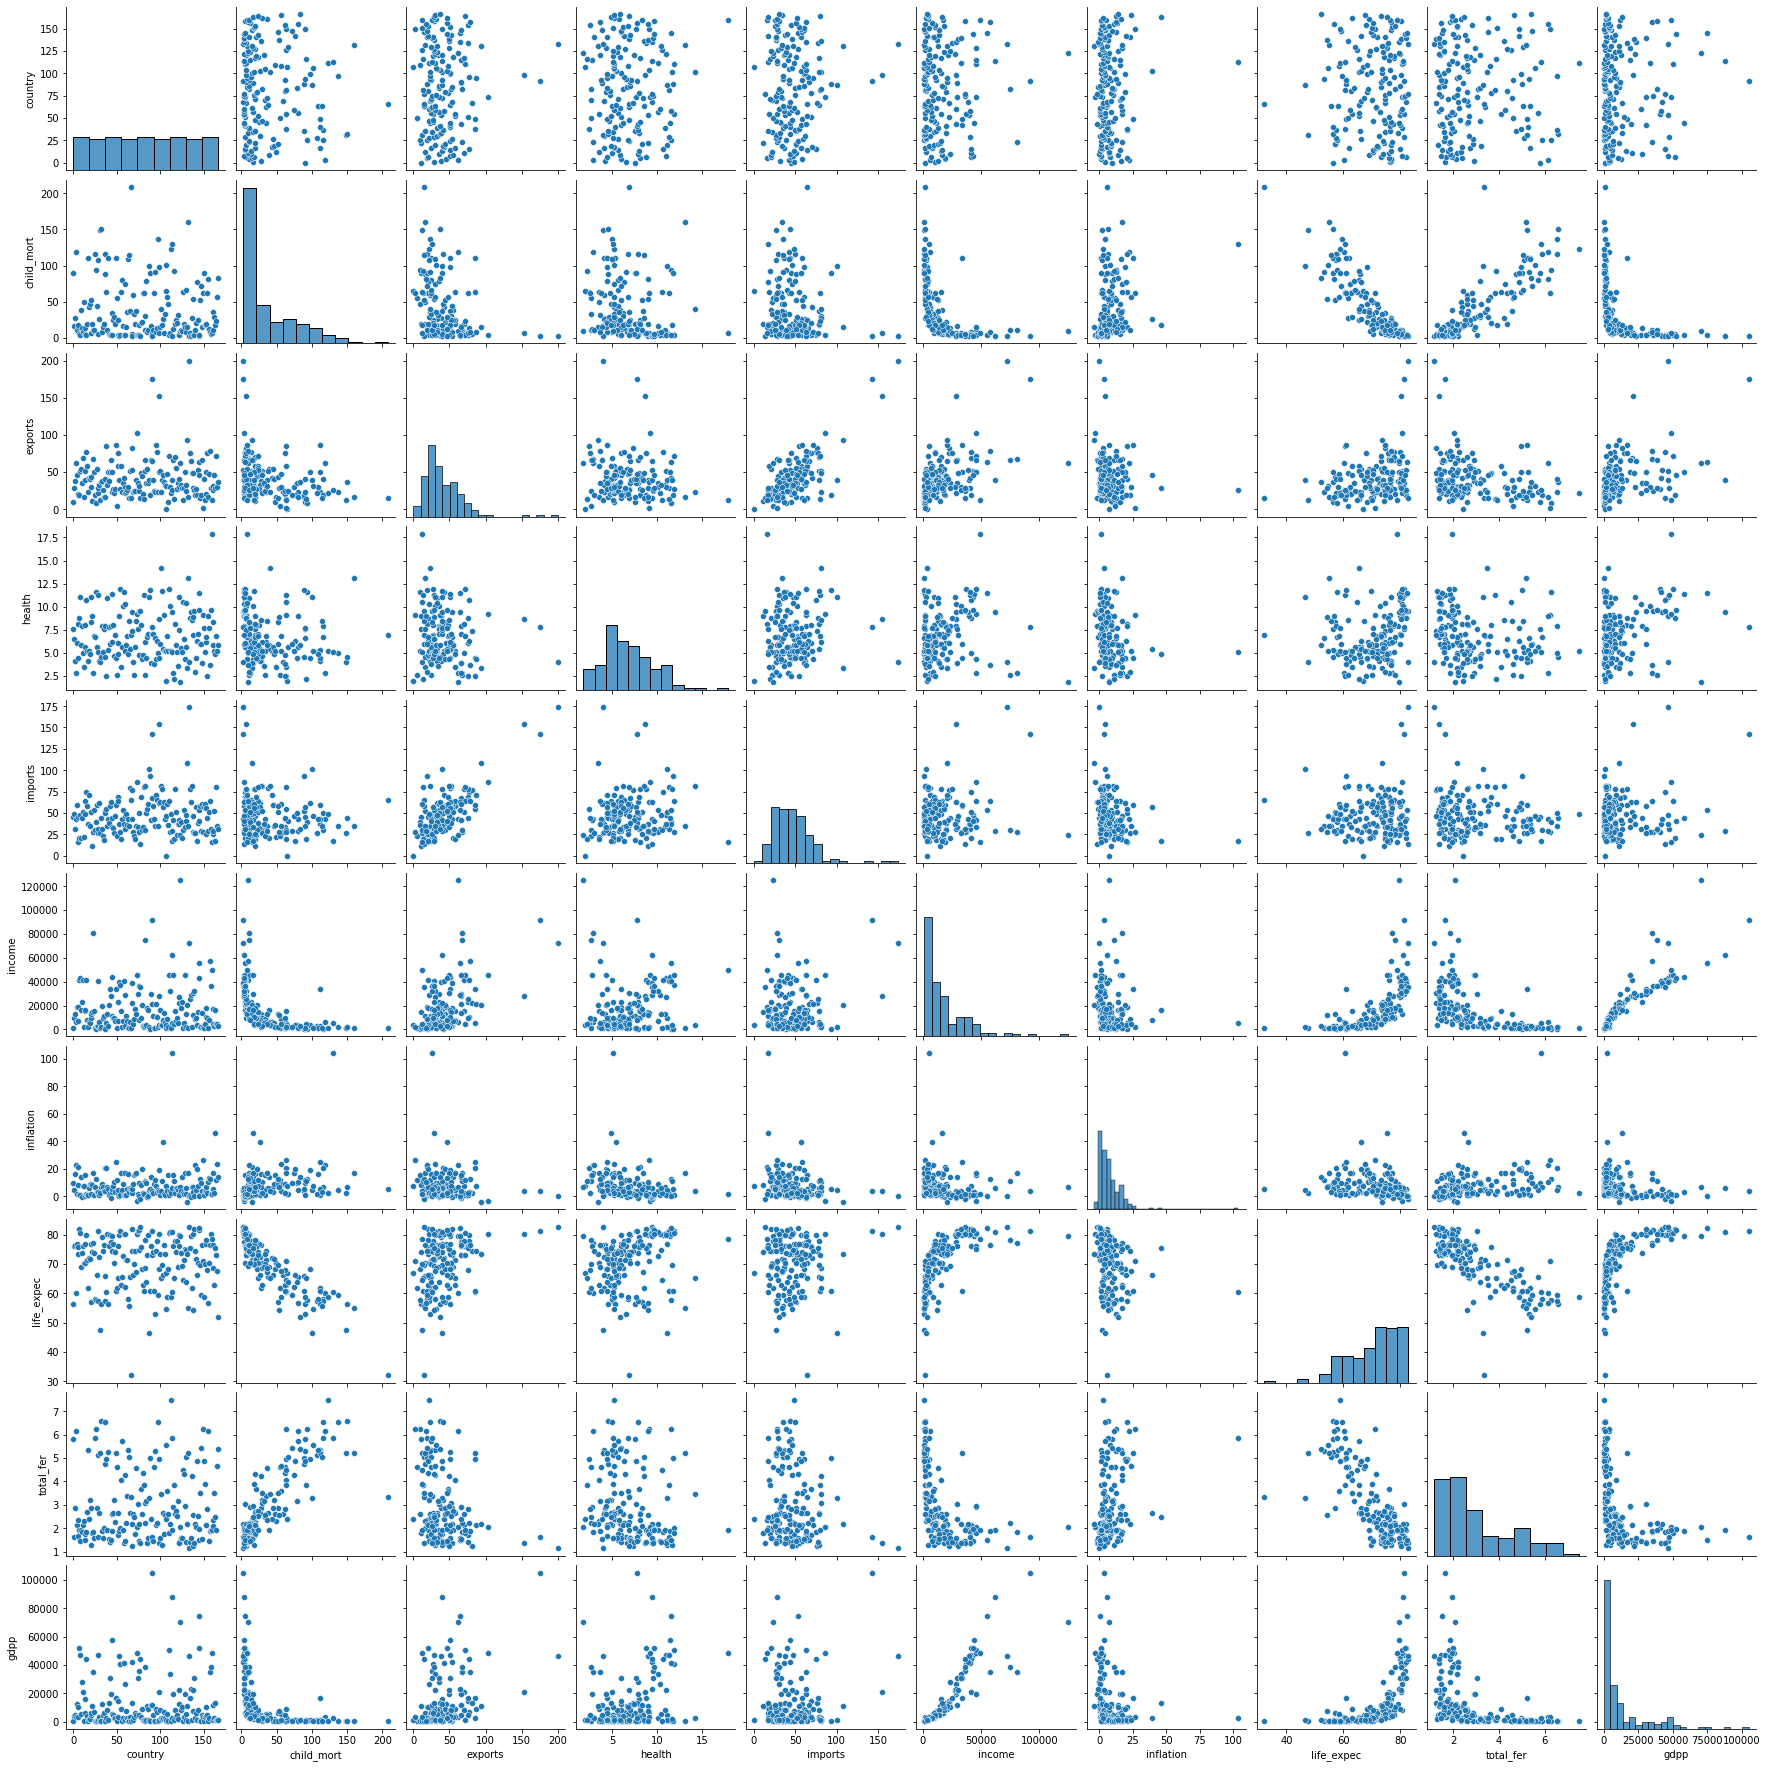

In [9]:
ax = sns.pairplot(data[data.columns])

In [10]:
X=data.iloc[:,:]

# Elbow

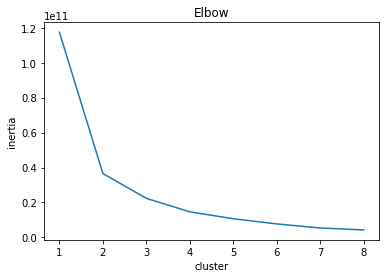

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
n=9
ilist=[]
for i in range(1,9):
    kmeans_model=KMeans(n_clusters=i)
    kmeans_model.fit(X)
    ilist.append(kmeans_model.inertia_)
plt.plot(range(1,n),ilist)
plt.title('Elbow')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

# K-Means Algorithm

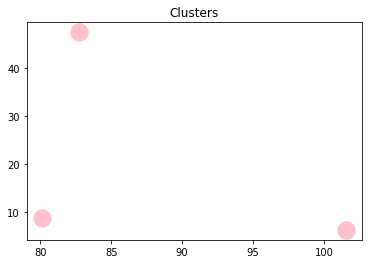

In [12]:
kmeans_model=KMeans(n_clusters=3)
y_pred=kmeans_model.fit_predict(X)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 300, c = 'pink')
plt.title('Clusters')
plt.show()

